In [308]:
% reset -f
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

In [309]:
def quad(L,k,x,xp,y,yp,s):
    xscale = L
    yscale = L
    x_pos = s[-1]
    y_pos = -yscale/2.0
    
    nslices = 20
    L = L/nslices
    for n in range(0,nslices,1):

        xnew = x[-1]
        xpnew = -k*x[-1]+xp[-1]
        ynew = y[-1]
        ypnew = k*y[-1]+yp[-1]
        
        x = np.vstack((x,xnew))
        xp = np.vstack((xp,xpnew))
        y = np.vstack((y,ynew))
        yp = np.vstack((yp,ypnew))
        s.append(x_pos)
    
    # Draw the quad
    rectangle = patches.Rectangle((x_pos,y_pos), xscale, yscale, facecolor='#004C97')
    plt.gca().add_patch(rectangle)
    
    return x,xp,y,yp

In [310]:
def drift(L,x,xp,y,yp,s):
    nslices = 20
    L = L/nslices
    for n in range(0,nslices,1):
        x1 = x[-1]+L*xp[-1]
        xp1 = xp[-1]
        y1 = y[-1]+L*yp[-1]
        yp1 = yp[-1]

        x = np.vstack((x,x1))
        xp = np.vstack((xp,xp1))
        y = np.vstack((y,y1))
        yp = np.vstack((yp,yp1))

        s.append(s[-1]+L)
    return x,xp,y,yp

In [311]:
def dipole(L,k,rot,x,xp,y,yp,s):
    xscale = L
    yscale = L
    x_pos = s[-1]
    y_pos = -yscale/2.0
    
    nslices = 20
    L = L/nslices
    for n in range(0,nslices,1):
        x1 = x[-1]+L*xp[-1]
        xp1 = xp[-1]+k*np.cos(rot)
        y1 = y[-1]+L*yp[-1]
        yp1 = yp[-1]+k*np.sin(rot)

        x = np.vstack((x,x1))
        xp = np.vstack((xp,xp1))
        y = np.vstack((y,y1))
        yp = np.vstack((yp,yp1))

        s.append(s[-1]+L)
    # Draw the dipole
    rectangle = patches.Rectangle((x_pos,y_pos), xscale, yscale, facecolor='#CB6015')
    plt.gca().add_patch(rectangle)
    return x,xp,y,yp

In [312]:
# Setup initial beam and arrays
nparticles = 500
sigx = 0.1
sigy = 0.15
x0 = np.random.normal(0.000,sigx,nparticles)
xp0 = np.random.normal(0,0.25*sigx,nparticles)
y0 = np.random.normal(0.000,sigy,nparticles)
yp0 = np.random.normal(0,0.05*sigy,nparticles)
x = np.vstack((x0,x0))
xp = np.vstack((xp0,xp0))
y = np.vstack((y0,y0))
yp = np.vstack((yp0,yp0))
s = [0,0]

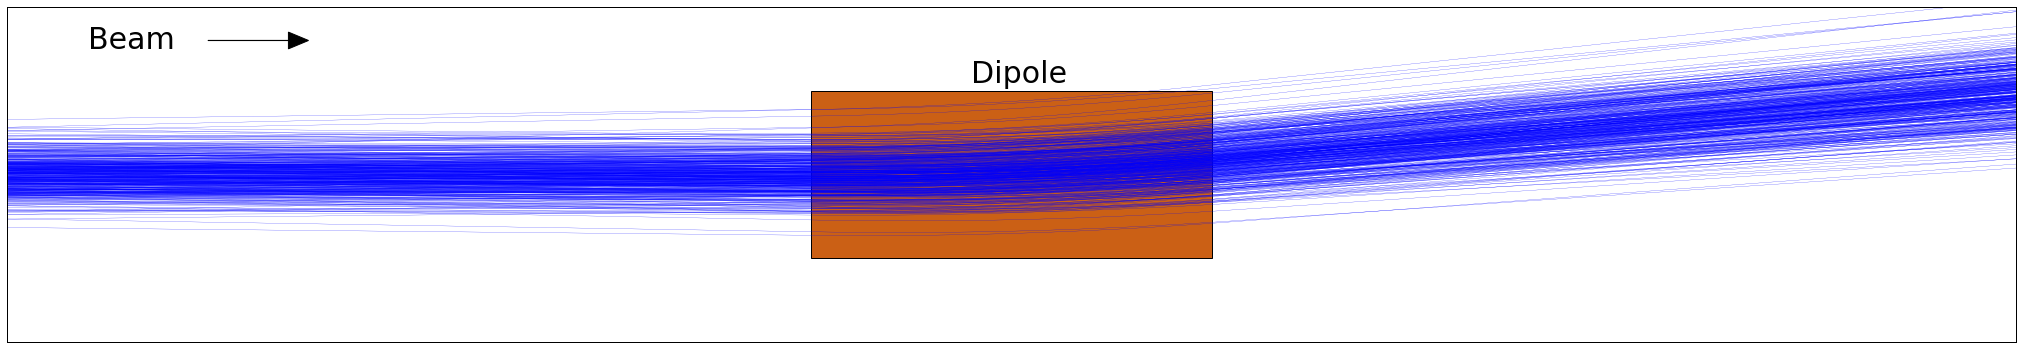

In [313]:
plt.figure(figsize=(36,6))

x,xp,y,yp = drift(2.0,x,xp,y,yp,s)
x,xp,y,yp = dipole(1.0,0.01,0.0,x,xp,y,yp,s)
x,xp,y,yp = drift(2.0,x,xp,y,yp,s)

for n in xrange(nparticles):
    plt.plot(s,np.transpose(x)[n],color="blue",linewidth=.2)

    plt.ylim(-1,1)
    plt.gca().set_xlim(left=0)
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])

plt.text(0.2,0.75,'Beam',fontsize=30)
plt.arrow( 0.5, 0.8, +0.2, 0.0, fc="k", ec="k",head_width=0.1, head_length=0.05 )

plt.text(2.4,0.55,'Dipole',fontsize=30)
    
plt.savefig('dipole.png')